# 다중회귀

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FLYAI/datasets/auto-mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FLYAI/datasets/auto-mpg.csv', na_values = ['?', '*', ''])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
df = df.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0]

In [14]:
X.shape, y.shape

((392, 7), (392,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022)

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [19]:
y_train = y_train.values
y_test = y_test.values

## 모델 만들기

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, input_shape = (7,), activation = 'relu'),  # 1번째 layer
    layers.Dense(32, activation = 'relu'),  # 2번째 layer
    layers.Dense(1)  # 마지막 layer, 회귀문제이므로 활성화 함수 X
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                512       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [28]:
EPOCHS = 1000

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse'])

In [29]:
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_split = 0.2)

Epoch 1/1000
8/8 [==============================] - 1s 60ms/step - loss: 574.8395 - mae: 22.7321 - mse: 574.8395 - val_loss: 638.2653 - val_mae: 24.0647 - val_mse: 638.2653
Epoch 2/1000
8/8 [==============================] - 0s 19ms/step - loss: 556.6456 - mae: 22.3459 - mse: 556.6456 - val_loss: 616.6050 - val_mae: 23.6437 - val_mse: 616.6050
Epoch 3/1000
8/8 [==============================] - 0s 12ms/step - loss: 536.7870 - mae: 21.9198 - mse: 536.7870 - val_loss: 592.1164 - val_mae: 23.1641 - val_mse: 592.1164
Epoch 4/1000
8/8 [==============================] - 0s 13ms/step - loss: 513.9175 - mae: 21.4279 - mse: 513.9175 - val_loss: 562.2141 - val_mae: 22.5720 - val_mse: 562.2141
Epoch 5/1000
8/8 [==============================] - 0s 18ms/step - loss: 486.8547 - mae: 20.8239 - mse: 486.8547 - val_loss: 525.1801 - val_mae: 21.8178 - val_mse: 525.1801
Epoch 6/1000
8/8 [==============================] - 0s 12ms/step - loss: 452.7029 - mae: 20.0498 - mse: 452.7029 - val_loss: 480.5955 -

In [30]:
# train에 사용되지 않은 val_loss 의 값이 낮을수록 좋은 모델!

In [31]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

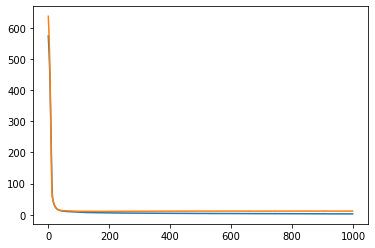

In [33]:
plt.plot(range(EPOCHS), history.history['loss'])
plt.plot(range(EPOCHS), history.history['val_loss'])
plt.show()

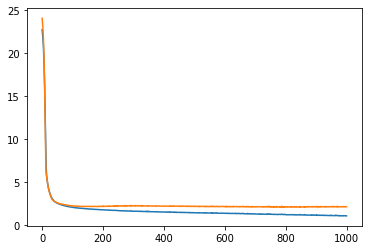

In [35]:
plt.plot(range(EPOCHS), history.history['mae'])
plt.plot(range(EPOCHS), history.history['val_mae'])
plt.show()

In [36]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 5.0848 - mae: 1.7361 - mse: 5.0848


[5.084817409515381, 1.7361071109771729, 5.084817409515381]